In [2]:
# activate R magic
%load_ext rpy2.ipython

In [ ]:
%%R
#install.packages("tidyverse")
#install.packages("plotly")
#install.packages("nortest")


# Carga de datos y paquetes


In [3]:
%%R
library(tidyverse)
library(ggplot2)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
%%R
#Cargando los datos
load("/content/drive/MyDrive/Colab Notebooks/Nacimientos_GT.RData")
#load("NacSimpl.RData")
head(NacSimpl)

# A tibble: 6 × 10
  Añoocu Asisrec Edadm Edadp Depocu    Escivm  Escivp  Sexo   Escolam  Escolap 
   <dbl> <fct>   <dbl> <dbl> <fct>     <fct>   <fct>   <fct>  <fct>    <fct>   
1   2009 Médica     28    30 Guatemala Casada  Soltero Hombre Ignorado Ignorado
2   2009 Médica     18    23 Guatemala Casada  Casado  Hombre Ignorado Ignorado
3   2009 Médica     40    32 Guatemala Casada  Casado  Mujer  Ignorado Ignorado
4   2009 Médica     28    30 Guatemala Soltera Soltero Mujer  Ignorado Ignorado
5   2009 Médica     34    33 Guatemala Soltera Soltero Hombre Ignorado Ignorado
6   2009 Médica     21    24 Guatemala Casada  Casado  Hombre Ignorado Ignorado


In [11]:
%%R
#Configurando los colores
mipaletaHex<-c("#F2167D","#049DD9","#05C7F2","#F2C641","#F2865E","#10B1C9","#FFD042","#F06B54","#81BD28","#743ACC")
mipaleta <- c(
  rgb(242, 22, 125,maxColorValue = 255, names = c("fucsia")) ,##F2167D
  rgb( 4, 157, 217,maxColorValue = 255, names = c("azul claro")),##049DD9
  rgb( 5, 199, 242,maxColorValue = 255, names = c("celeste")),##05C7F2
  rgb(242, 198, 65,maxColorValue = 255, names = c("amarillo")),##F2C641
  rgb(242, 134, 94,maxColorValue = 255, names = c("anaranjado claro")),##F2865E
  rgb(16, 177, 201,maxColorValue = 255, names = c("azulado")),##10B1C9
  rgb(255, 208, 66,maxColorValue = 255, names = c("amarillo oscuro")),##FFD042
  rgb(240, 107, 84,maxColorValue = 255, names = c("anaranjado oscuro")),##F06B54
  rgb(129, 189, 40,maxColorValue = 255, names = c("verde")),##81BD28
  rgb(116, 58, 204,maxColorValue = 255, names = c("morado"))##743ACC
  
)

# Descripción del conjunto de datos
Este conjunto de datos fue extraido de las bases de datos del [Instituto Nacional de Estadísticas (INE)](https://www.ine.gob.gt/ine/). Se trata de los datos de los nacimientos registrados entre los años 2009 a 2019 en Guatemala. Originalmente se contaba con 10 archivos (1 por año) que se unificaron. Se crearon variables con valores faltantes en aquellos archivos donde no había información con el objetivo de unificar las filas. El conjunto está compuesto por 4,162,965 observaciones de 46 variables. Se escogieron las siguientes 10 variables para hacer un análisis preliminar.

### Descripción de variables:

-   **Añoocu**: Año en el que se produjo el nacimiento

    -   Rango: 2009 - 2019

-   **Asisrec**: Tipo de asistencia recibida en el alumbramiento

    -   Valores posibles: (Comadrona, Médica, Paramédica, Empírica, Ninguna, Ignorado)

-   **Depocu**: Departamento de ocurrencia del nacimiento

-   **Edadm**: Edad de la madre

-   **Edadp**: Edad del padre

-   **Escivm**: Estado Civil de la madre

    -   Valores Posibles: (Soltera, Casada, Unida, Viuda, Divorciada,Ignorado)

-   **Escivp**: Estado Civil del padre

    -   Valores Posibles: (Soltero, Casado, Unido, Viudo, Divorciado,Ignorado)

-   **Escolam**: Escolaridad de la madre

    -   Valores Posibles: Básico, Diversificado, Doctorado, Ignorado, Ninguno, Postgrado, Primaria, Universitario

-   **Escolap**: Escolaridad del padre

    -   Valores Posibles: Básico, Diversificado, Doctorado, Ignorado, Ninguno, Postgrado, Primaria, Universitario

-   **Sexo**: Género del recien nacido

    -   Valores Posibles: Hombre, Mujer


#Análisis Exploratorio

## <font color="#0896c9">Año de Nacimiento</font>



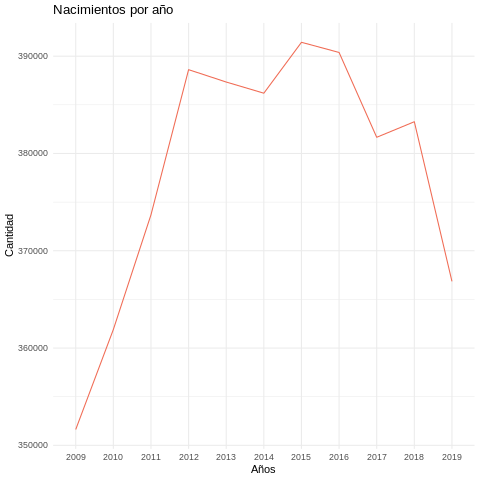

In [12]:
%%R
nacXanio<-as.data.frame(table(NacSimpl$Añoocu))
names(nacXanio)<-c("Año","Cantidad")


g<-ggplot(nacXanio, aes(x = Año, y = Cantidad ))+ 
  geom_line(aes(group=3), color="#F06B54") +
  labs(title="Nacimientos por año",
        x ="Años", y = "Cantidad")+
  theme_minimal()
  

g

### ¿Qué nos dice la gráfica anterior? ¿Qué años registran mayor cantidad de nacimientos?¿y menor?

<font color="blue"> Explique en el espacio de abajo lo que le parece interesante. </font>

me parece interesante...

<font color="green">Explique aquí haciendo doble click para escribir</font>

no me sale con doble clic, tengo que hacer clic en el texto

## <font color="#0896c9">Asistencia en el nacimiento</font>

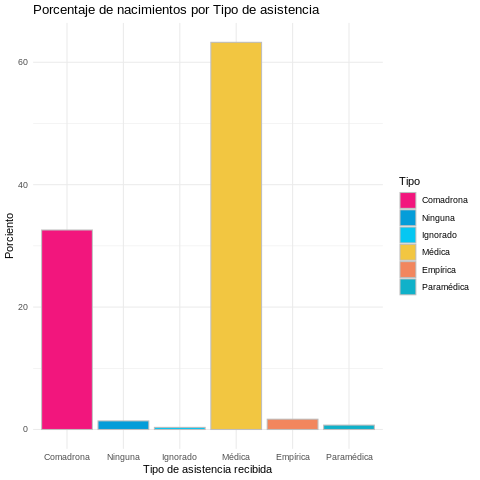

In [13]:
%%R
prop.table(table(NacSimpl$Asisrec))*100

asisRecXnac<-as.data.frame(prop.table(table(NacSimpl$Asisrec))*100)
names(asisRecXnac)<-c("Tipo","Porciento")

g<-ggplot(asisRecXnac, aes(x = Tipo, y = Porciento, fill=Tipo ))+ 
  geom_bar(stat = "identity", color="gray")+
  labs(title="Porcentaje de nacimientos por Tipo de asistencia",
        x ="Tipo de asistencia recibida", y = "Porciento")+
  theme_minimal()+scale_fill_manual(values=mipaletaHex)

 
g

### ¿Cuáles son las dos formas de asistencia en el nacimiento que predominan?¿Cuáles son los porcentajes?

## <font color="#0896c9">Edad de los padres</font>

[1] "Resumen de la edad de la madre"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  10.00   20.00   25.00   25.61   30.00   59.00   12977 


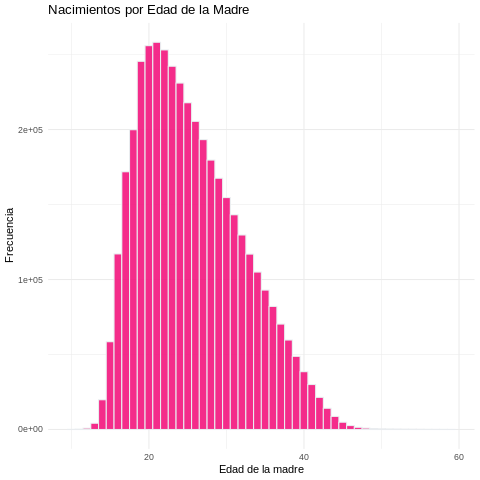

In [14]:
%%R
print("Resumen de la edad de la madre")
print(summary(NacSimpl$Edadm))
edadMDF <- NacSimpl[complete.cases(NacSimpl$Edadm),]

g <-ggplot(edadMDF, aes(x=Edadm)) +
     geom_histogram( binwidth=1, fill=mipaletaHex[1], color="#e9ecef", alpha=0.9) +
    #geom_histogram(binwidth=1)+
    labs(title="Nacimientos por Edad de la Madre",
        x ="Edad de la madre", y = "Frecuencia")+
  theme_minimal()

g

[1] "Resumen de la edad del padre"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   12.0    23.0    28.0    29.4    34.0    96.0  546419 


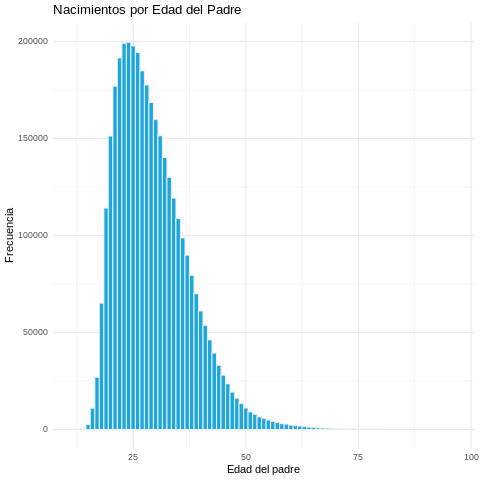

In [18]:
%%R
print("Resumen de la edad del padre")
print(summary(NacSimpl$Edadp))
edadPDF <- NacSimpl[complete.cases(NacSimpl$Edadp),]
dfEdadP <- as.data.frame(edadPDF$Edadp)
names(dfEdadP)<-c("Edad")
dfEdadM <- as.data.frame(edadPDF$Edadm)
names(dfEdadM)<-c("Edad")
dfEdadP$Progenitor<-"Padre"
dfEdadM$Progenitor<-"Madre"
dfEdad <- rbind(dfEdadM,dfEdadP)
dfEdad<-dfEdad[complete.cases(dfEdad$Edad),]
rm(dfEdadM,dfEdadP)
g <-ggplot(edadPDF, aes(x=Edadp)) +
    # geom_histogram( binwidth=3, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    geom_histogram(binwidth=1,fill=mipaletaHex[2], color="#e9ecef", alpha=0.9)+
    theme_minimal()+
    labs(title="Nacimientos por Edad del Padre",
        x ="Edad del padre", y = "Frecuencia")
g


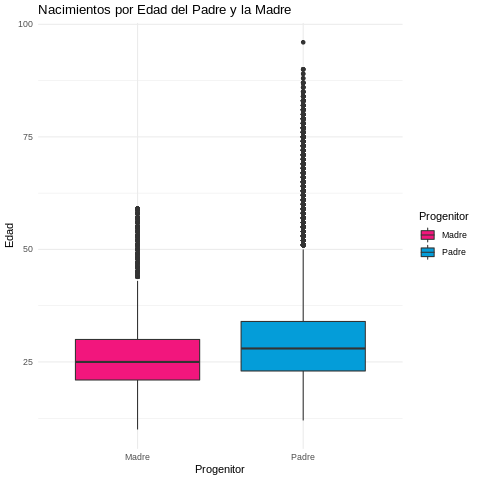

In [17]:
%%R
f <- ggplot(dfEdad, aes(x=Progenitor, y=Edad, fill=Progenitor)) + 
    geom_boxplot()+
  scale_fill_manual(values = mipaletaHex[c(1,2)])+
  theme_minimal()+
    labs(title="Nacimientos por Edad del Padre y la Madre",
        x ="Progenitor", y = "Edad")
f

 

1.   ¿Cuáles son las edades más frecuentes de las madres?
2.   ¿y de los padres?
3.   ¿En general quien es más joven al momento del nacimiento, el padre o la madre?
4.  ¿Que edad tenía la madre más joven al momento del nacimiento?
5.  ¿Qué edad tenía el padre más joven al momento del nacimiento?
6.  ¿Qué edad tenía la madre más vieja en el momento del nacimiento?
7.  ¿Qué edad tenía el padre más viejo en el momento del nacimiento?

<font color="blue">Responda las preguntas en el cuadro de abajo</font>

## <font color="#0896c9">Nacimientos por departamento</font>

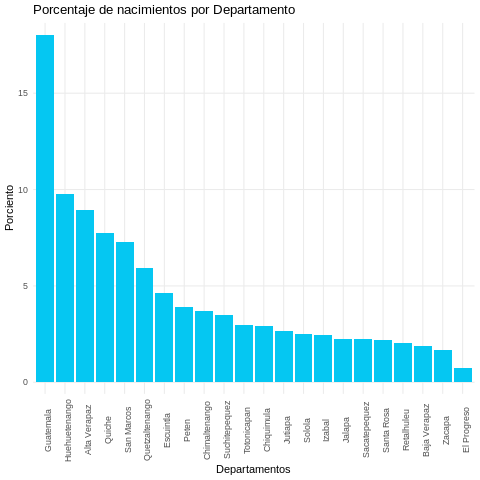

In [19]:
%%R
porcNacXdpto<-as.data.frame(sort(prop.table(table(NacSimpl$Depocu))*100,decreasing = T))
names(porcNacXdpto)<-c("Departamento","Porciento")
 
g<-ggplot(porcNacXdpto, aes(x = Departamento, y = Porciento ))+ 
  geom_bar(stat = "identity", fill=mipaletaHex[3])+
  labs(title="Porcentaje de nacimientos por Departamento",
        x ="Departamentos", y = "Porciento")+
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 90))+
  scale_y_discrete(name ="Porciento", 
                    limits=seq(0,20,5))
  

g

#### ¿Qué departamentos reportan mayor número de nacimientos?

##<font color="#0896c9"> Estado civil de los padres</font>

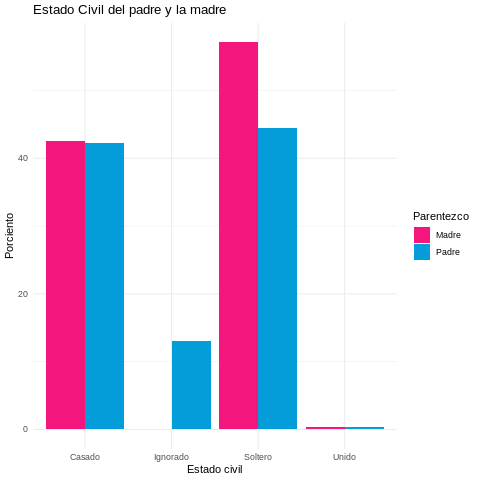

In [20]:
%%R
estCivPorcPadre<-as.data.frame(round(prop.table(table(NacSimpl$Escivp))*100,1))
estCivPorcmadre<-as.data.frame(round(prop.table(table(NacSimpl$Escivm))*100,1))
estCivPorcPadre$Padre<-"Padre"
estCivPorcmadre$Padre<-"Madre"
estCivPorcmadre$Var1<-c("Soltero","Casado","Unido","Ignorado")
estCivPorc<-rbind(estCivPorcmadre,estCivPorcPadre)
colnames(estCivPorc)<-c("EstadoCivil","Porciento","Parentezco")
rm(estCivPorcmadre,estCivPorcPadre)
estCivPorc

g <- ggplot(data=estCivPorc, aes(x=EstadoCivil, y=Porciento, fill=Parentezco)) +
      geom_bar(stat="identity", position=position_dodge()) +
      scale_fill_manual(values = mipaletaHex[c(1,2)])+
      theme_minimal()+
      labs(title="Estado Civil del padre y la madre",
          x ="Estado civil", y = "Porciento")
g



1.   ¿Cuál es el estado civil que predomina en general?
2.   ¿Cuál es el estado civil que predomina en las madres?
3.   Si pudiera especular, ¿Qué explicación daría al comportamiento de la categoría donde se ignora el estado civil del padre y madre?



## <font color="#0896c9">Sexo del recién nacido</font>

    Sexo Porciento
1 Hombre        51
2  Mujer        49


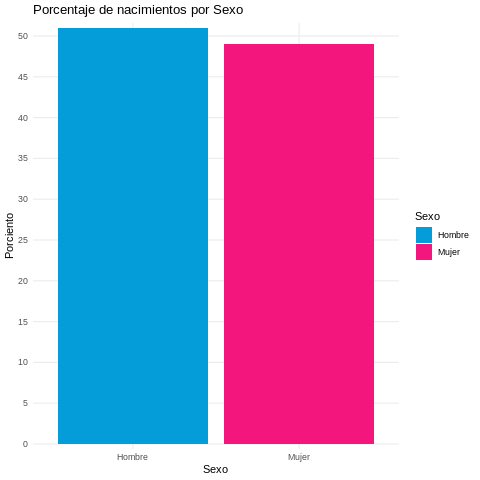

In [21]:
%%R
sexoPorc<-as.data.frame(round(prop.table(table(NacSimpl$Sexo))*100,0))
names(sexoPorc)<-c("Sexo", "Porciento")

g<-ggplot(sexoPorc, aes(x = Sexo, y = Porciento, fill=Sexo ))+ 
  geom_bar(stat = "identity")+
  labs(title="Porcentaje de nacimientos por Sexo",
        x ="Sexo", y = "Porciento")+
  theme_minimal()+
  scale_y_discrete(name ="Porciento", 
                    limits=seq(0,55,5))+
  scale_fill_manual(values = mipaletaHex[c(2,1)])
  
print(sexoPorc)
g

¿Nacen más niños o más niñas?¿De cuánto es la diferencia?

In [22]:
%%R
escolaridadPorcP<-as.data.frame(round(prop.table(table(NacSimpl$Escolap))*100,3))
escolaridadPorcM<-as.data.frame(round(prop.table(table(NacSimpl$Escolam))*100,3))
escolaridadPorcM$Parentezco<-"Madre"
escolaridadPorcP$Parentezco<-"Padre"
escolaridadPorc<-rbind(escolaridadPorcM, escolaridadPorcP)
names(escolaridadPorc)<-c("Escolaridad", "Porciento", "Parentezco")
rm(escolaridadPorcM,escolaridadPorcP)
escolaridadPorc

     Escolaridad Porciento Parentezco
1         Básico    11.103      Madre
2  Diversificado    13.839      Madre
3      Doctorado     0.001      Madre
4       Ignorado    12.518      Madre
5        Ninguno    26.759      Madre
6      Postgrado     0.012      Madre
7       Primaria    34.125      Madre
8  Universitario     1.643      Madre
9         Básico    11.251      Padre
10 Diversificado    13.531      Padre
11     Doctorado     0.001      Padre
12      Ignorado    23.195      Padre
13       Ninguno    15.114      Padre
14     Postgrado     0.020      Padre
15      Primaria    34.836      Padre
16 Universitario     2.052      Padre


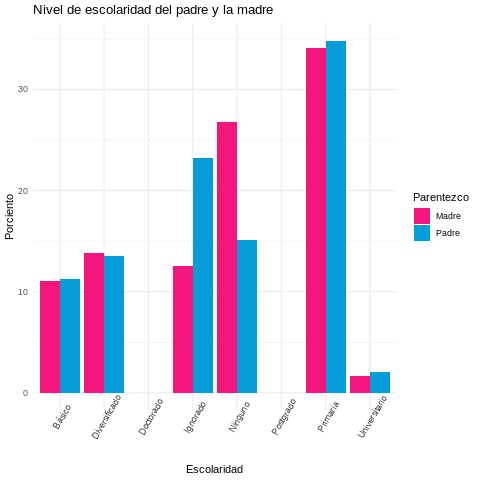

In [23]:
%%R
g <- ggplot(data=escolaridadPorc, aes(x=Escolaridad, y=Porciento, fill=Parentezco)) +
      geom_bar(stat="identity", position=position_dodge()) +
      scale_fill_manual(values = mipaletaHex[c(1,2)])+
      theme_minimal()+
      theme(axis.text.x = element_text(angle = 60))+
      labs(title="Nivel de escolaridad del padre y la madre",
          x ="Escolaridad", y = "Porciento")
g



1.   ¿Cuál es el nivel de escolaridad que predomina para ambos padres?
2.   ¿Cuál es el segundo nivel de escolaridad más frecuente para las madres?
3.  ¿Cuál es el segundo nivel de escolaridad más frecuente para los padres?



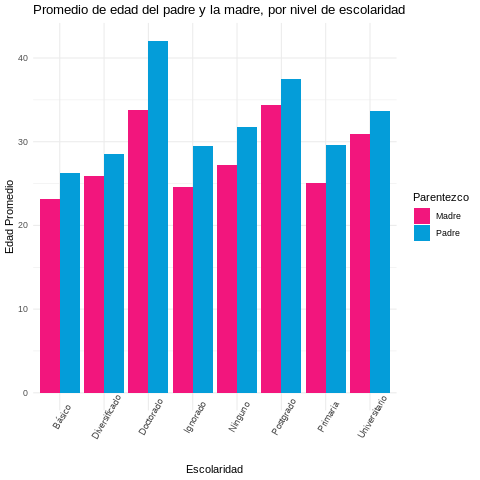

In [35]:
%%R
edadPromMadre<-NacSimpl %>% group_by(Escolam) %>% summarise(promEdad = mean(Edadm, na.rm=TRUE))
edadPromMadre$Parentezco<-"Madre"
edadPromPadre<-NacSimpl %>% group_by(Escolap) %>% summarise(promEdad = mean(Edadp, na.rm=TRUE))
edadPromPadre$Parentezco<-"Padre"
colnames(edadPromMadre)<-c("Escolaridad","EdadPromedio","Parentezco")
colnames(edadPromPadre)<-c("Escolaridad","EdadPromedio","Parentezco")
edadPromSegunEscolaridad<-rbind(edadPromMadre,edadPromPadre)
rm(edadPromPadre,edadPromMadre)
g <- ggplot(data=edadPromSegunEscolaridad, aes(x=Escolaridad, y=EdadPromedio, fill=Parentezco)) +
      geom_bar(stat="identity", position=position_dodge()) +
      scale_fill_manual(values = mipaletaHex[c(1,2)])+
      theme_minimal()+
      theme(axis.text.x = element_text(angle = 60))+
      labs(title="Promedio de edad del padre y la madre, por nivel de escolaridad",
          x ="Escolaridad", y = "Edad Promedio")
g

1. ¿En cuál nivel de escolaridad el promedio de edad es mayor en las mujeres?
2. ¿En cuál nivel de escolaridad el promedio de edad es mayor en los hombres?
3. ¿Quién se demora más en tener hijos, las mujeres o los hombres?¿Por qué cree que esto sucede?